# **LAB 3 - PART 2 Regression**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader as web
import yfinance as yf
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

C:\Users\Kolawat\AppData\Local\Temp\ipykernel_16000\1116819237.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [3]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2024-1-25')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%*****************

### **Exploring the Data**

In [4]:
stk_data

Price        Adj Close                               Close              \
Ticker           GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   85.148705   96.450584   52.248001  108.671127   
2019-01-02   52.734001   86.302322   96.023270   52.734001  110.143402   
2019-01-03   51.273499   84.579414   92.490761   51.273499  107.944550   
2019-01-04   53.903500   87.882904   96.792435   53.903500  112.160614   
2019-01-07   53.796001   88.504623   96.915871   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2024-01-18  143.479996  166.839996  393.869995  143.479996  166.839996   
2024-01-19  146.380005  171.479996  398.670013  146.380005  171.479996   
2024-01-22  145.990005  172.830002  396.510010  145.990005  172.830002   
2024-01-23  147.039993  173.940002  398.899994  147.039993  173.940002   
2024-01-24  148.699997  173.929993  402.559998  148.699997  173.929993   

Price                         High                                 Low  \
Ticker            MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2024-01-18  393.869995  144.210007  166.990005  393.989990  141.990005   
2024-01-19  398.670013  146.449997  171.580002  398.670013  144.380005   
2024-01-22  396.510010  148.389999  174.449997  400.619995  145.839996   
2024-01-23  398.899994  147.179993  174.020004  399.380005  145.500000   
2024-01-24  402.559998  149.850006  174.860001  405.630005  148.100006   

Price                                     Open                          \
Ticker             IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2024-01-18  165.039993  390.119995  142.050003  166.490005  391.720001   
2024-01-19  169.179993  393.500000  144.740005  170.589996  395.760010   
2024-01-22  172.399994  393.589996  147.100006  172.820007  400.019989   
2024-01-23  172.479996  393.929993  145.889999  172.899994  395.750000   
2024-01-24  172.899994  400.450012  148.539993  174.759995  401.540009   

Price         Volume                     
Ticker         GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2024-01-18  25746400  3776900  23392100  
2024-01-19  33300700  6925800  29272000  
2024-01-22  32200400  4926000  27016900  
2024-01-23  21636100  3983500  20525900  
2024-01-24  25233500  9097800  24867000  

[1275 rows x 18 columns]

In [5]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-02-08,109.76,1.2933
2019-02-11,110.40,1.2862
2019-02-12,110.50,1.2887
2019-02-13,110.86,1.2865
2019-02-14,110.68,1.2793
...,...,...
2024-01-29,147.65,1.2681
2024-01-30,147.71,1.2683
2024-01-31,146.26,1.2733


In [6]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-02-08,2707.88,25106.33,15.72
2019-02-11,2709.80,25053.11,15.97
2019-02-12,2744.73,25425.76,15.43
2019-02-13,2753.03,25543.27,15.65
2019-02-14,2745.73,25439.39,16.22
...,...,...,...
2024-01-31,4845.65,38150.30,14.35
2024-02-01,4906.19,38519.84,13.88
2024-02-02,4958.61,38654.42,13.85


Let's 
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [7]:
### START CODE HERE ###
base = stk_data['Adj Close']['MSFT']
X1 = stk_data['Adj Close'][['GOOGL', 'IBM']]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###

**Standardize `X1-3`**

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.


In [8]:
### START CODE HERE ###
standard_scaler = preprocessing.StandardScaler()
X1.loc[:, X1.columns] = standard_scaler.fit_transform(X1)
X2.loc[:, X2.columns] = standard_scaler.fit_transform(X2)
X3.loc[:, X3.columns] = standard_scaler.fit_transform(X3)
### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [9]:
### START CODE HERE ###
return_period = 3  # daily return
k1 = 3
k2 = 6
k3 = 12
k = [k1, k2, k3]

Y = base.shift(-return_period)

# Choose calculation of difference price either past (Guide#1) or next (Guide#2)

# Guide#1 for using price of past [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT': base.diff(k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT': base.diff(k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT': base.diff(k[2]*return_period)})


X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [10]:
### START CODE HERE ###
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([X, Y], axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [11]:
dataset

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,-1.553107,-1.922158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.792435
2019-01-02,-1.536860,-1.851664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.915871
2019-01-03,-1.585685,-1.956945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.618591
2019-01-04,-1.497764,-1.755081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.014481
2019-01-07,-1.501357,-1.717090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.378265
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,NaN,NaN,1.698652,-0.145693,1.659693,1.804958,-0.833645,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,1.693433,-0.154727,1.755823,1.900008,-0.890401,NaN,NaN,NaN,NaN
2024-02-02,NaN,NaN,1.847403,-0.305285,1.839060,1.934624,-0.894024,NaN,NaN,NaN,NaN
2024-02-05,NaN,NaN,NaN,NaN,1.813971,1.864070,-0.915760,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [12]:
### START CODE HERE ###
dataset = dataset.dropna()
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1222 entries, 2019-02-22 to 2024-01-19
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GOOGL      1222 non-null   float64
 1   IBM        1222 non-null   float64
 2   DEXJPUS    1222 non-null   float64
 3   DEXUSUK    1222 non-null   float64
 4   SP500      1222 non-null   float64
 5   DJIA       1222 non-null   float64
 6   VIXCLS     1222 non-null   float64
 7   MSFT_3DT   1222 non-null   float64
 8   MSFT_6DT   1222 non-null   float64
 9   MSFT_12DT  1222 non-null   float64
 10  MSFT       1222 non-null   float64
dtypes: float64(11)
memory usage: 114.6 KB


,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,0.037235,0.027807,-0.009833,-0.000029,-0.006596,-0.008630,0.017244,1.988185,4.036762,8.069618,237.682238
std,0.980664,0.977568,0.994563,1.008259,0.985139,0.987102,1.008392,11.281073,15.530967,20.640112,72.346999
min,-1.563504,-2.531752,-1.155013,-3.202027,-2.481905,-3.225698,-1.172974,-33.900177,-52.498260,-60.695984,105.273697
25%,-0.902311,-0.712100,-0.789171,-0.714051,-0.928661,-0.935796,-0.652509,-3.323559,-4.498116,-1.784039,177.755901
50%,0.097453,0.011595,-0.583171,-0.099020,0.212337,0.324677,-0.202687,2.515572,4.770676,9.342606,242.708130
75%,0.934693,0.554600,0.950006,0.707596,0.854489,0.803096,0.455140,8.761684,13.217346,20.382099,291.176399
max,1.709352,3.353240,2.044432,2.044930,1.650419,1.731266,7.418927,35.238464,48.708038,72.977783,402.559998


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [13]:
### START CODE HERE ###
Y = dataset.iloc[:, -1]
X = dataset.iloc[:, :-1]

### END CODE HERE ###

**Calculate the Correlation**

Drop columns that have correlation more than 0.9.

In [14]:
### START CODE HERE ###
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Find columns with correlation greater than 0.9
dropped_columns = []
for column in correlation_matrix.columns:
    correlated_columns = correlation_matrix[column][correlation_matrix[column] > 0.9].index.tolist(
    )
    for correlated_column in correlated_columns:
        if correlated_column != column and correlated_column not in dropped_columns:
            dropped_columns.append(correlated_column)

# Drop the correlated columns
X_standardized_dropped = X.drop(dropped_columns, axis=1)
X_standardized = X_standardized_dropped
# Show the dropped columns
print("Dropped Columns:", dropped_columns)

### END CODE HERE ###

Dropped Columns: ['SP500', 'DJIA', 'GOOGL']


In [15]:
X

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-02-22,-1.433427,-0.676992,-0.621337,0.357172,-1.600201,-1.312068,-0.935081,5.482925,6.043159,9.376259
2019-02-25,-1.432140,-0.667268,-0.597197,0.345127,-1.594739,-1.296600,-0.773266,6.472969,8.666542,10.394814
2019-02-26,-1.424318,-0.655228,-0.617422,0.635704,-1.598248,-1.305337,-0.734624,5.649986,6.134247,14.661644
2019-02-27,-1.422847,-0.680696,-0.606984,0.735073,-1.600662,-1.324067,-0.791380,5.544739,7.804756,10.178764
2019-02-28,-1.416729,-0.728856,-0.576973,0.668827,-1.613190,-1.341856,-0.791380,5.325760,9.238091,9.921822
...,...,...,...,...,...,...,...,...,...,...
2024-01-12,1.469040,3.006156,1.607314,-0.126121,1.561530,1.661608,-1.032895,12.429993,17.739990,11.029999
2024-01-16,1.463691,3.077040,1.747583,-0.260118,1.533186,1.601971,-0.895231,19.399994,17.619995,17.199982
2024-01-17,1.429592,3.023266,1.837617,-0.246567,1.490678,1.577677,-0.780512,18.869995,16.209991,11.619995
2024-01-18,1.496787,3.069706,1.821959,-0.214950,1.556941,1.629619,-0.860212,25.929993,23.250000,16.440002


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [16]:
### START CODE HERE ###
test_size = 0.3
train_size = 0.7

X_train, X_test = X[:int(len(X)*train_size)], X[int(len(X)*train_size):]
Y_train, Y_test = Y[:int(len(Y)*train_size)], Y[int(len(Y)*train_size):]


### START CODE HERE ###

### **Grid Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- Your parameters are assigned according to Lab direction.
- `Linear Regression: {'fit_intercept': [True, False]}`
- `SVR: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

<img src="./parameter.png">

In [17]:

# Initialize models
linear_regression = LinearRegression()
svr = SVR()

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [18]:
regression = {
    'LR': LinearRegression(),
    'SVR': SVR()
}

fit_intercept = [True, False]
params_LR = dict(fit_intercept=fit_intercept)

kernel = ['linear', 'rbf', 'poly']
C_list = [0.1, 10]
gamma = [0.01]
degree = [2, 3]
params_SVR = dict(kernel=kernel, C=C_list, gamma=gamma, degree=degree)

best_params = {}

for EST in regression:
    model = regression[EST]
    if EST == 'LR':
        params = params_LR
    else:
        params = params_SVR
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='neg_mean_squared_error',
        cv=4,
        verbose=4,
        n_jobs=1)
    print('Training', EST)
    grid_result = grid.fit(X_train, Y_train)
    best_params[EST] = grid_result.best_params_
    print('Best Params', grid_result.best_params_)

Training LR
Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4] END .............fit_intercept=True;, score=-366.167 total time=   0.0s
[CV 2/4] END .............fit_intercept=True;, score=-315.709 total time=   0.0s
[CV 3/4] END ..............fit_intercept=True;, score=-59.191 total time=   0.0s
[CV 4/4] END .............fit_intercept=True;, score=-680.686 total time=   0.0s
[CV 1/4] END ..........fit_intercept=False;, score=-44533.506 total time=   0.0s
[CV 2/4] END ..........fit_intercept=False;, score=-24642.668 total time=   0.0s
[CV 3/4] END ..........fit_intercept=False;, score=-15730.876 total time=   0.0s
[CV 4/4] END ..........fit_intercept=False;, score=-80896.055 total time=   0.0s
Best Params {'fit_intercept': True}
Training SVR
Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=-2656.409 total time=   0.0s
[CV 2/4] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=-525.235 total

[CV 1/4] END C=10, degree=2, gamma=0.01, kernel=linear;, score=-501.092 total time=   0.6s
[CV 2/4] END C=10, degree=2, gamma=0.01, kernel=linear;, score=-326.692 total time=   0.6s
[CV 3/4] END C=10, degree=2, gamma=0.01, kernel=linear;, score=-55.312 total time=   0.9s
[CV 4/4] END C=10, degree=2, gamma=0.01, kernel=linear;, score=-164.193 total time=   0.3s
[CV 1/4] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=-4274.829 total time=   0.0s
[CV 2/4] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=-5047.518 total time=   0.0s
[CV 3/4] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=-1993.485 total time=   0.0s
[CV 4/4] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=-7783.598 total time=   0.0s
[CV 1/4] END C=10, degree=2, gamma=0.01, kernel=poly;, score=-6401.637 total time=   0.0s
[CV 2/4] END C=10, degree=2, gamma=0.01, kernel=poly;, score=-7475.500 total time=   0.0s
[CV 3/4] END C=10, degree=2, gamma=0.01, kernel=poly;, score=-3092.828 total time=   0.0s
[CV 4/4] EN

Utilize the best parameters obtained from grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the compared dataframe with the Y_train.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
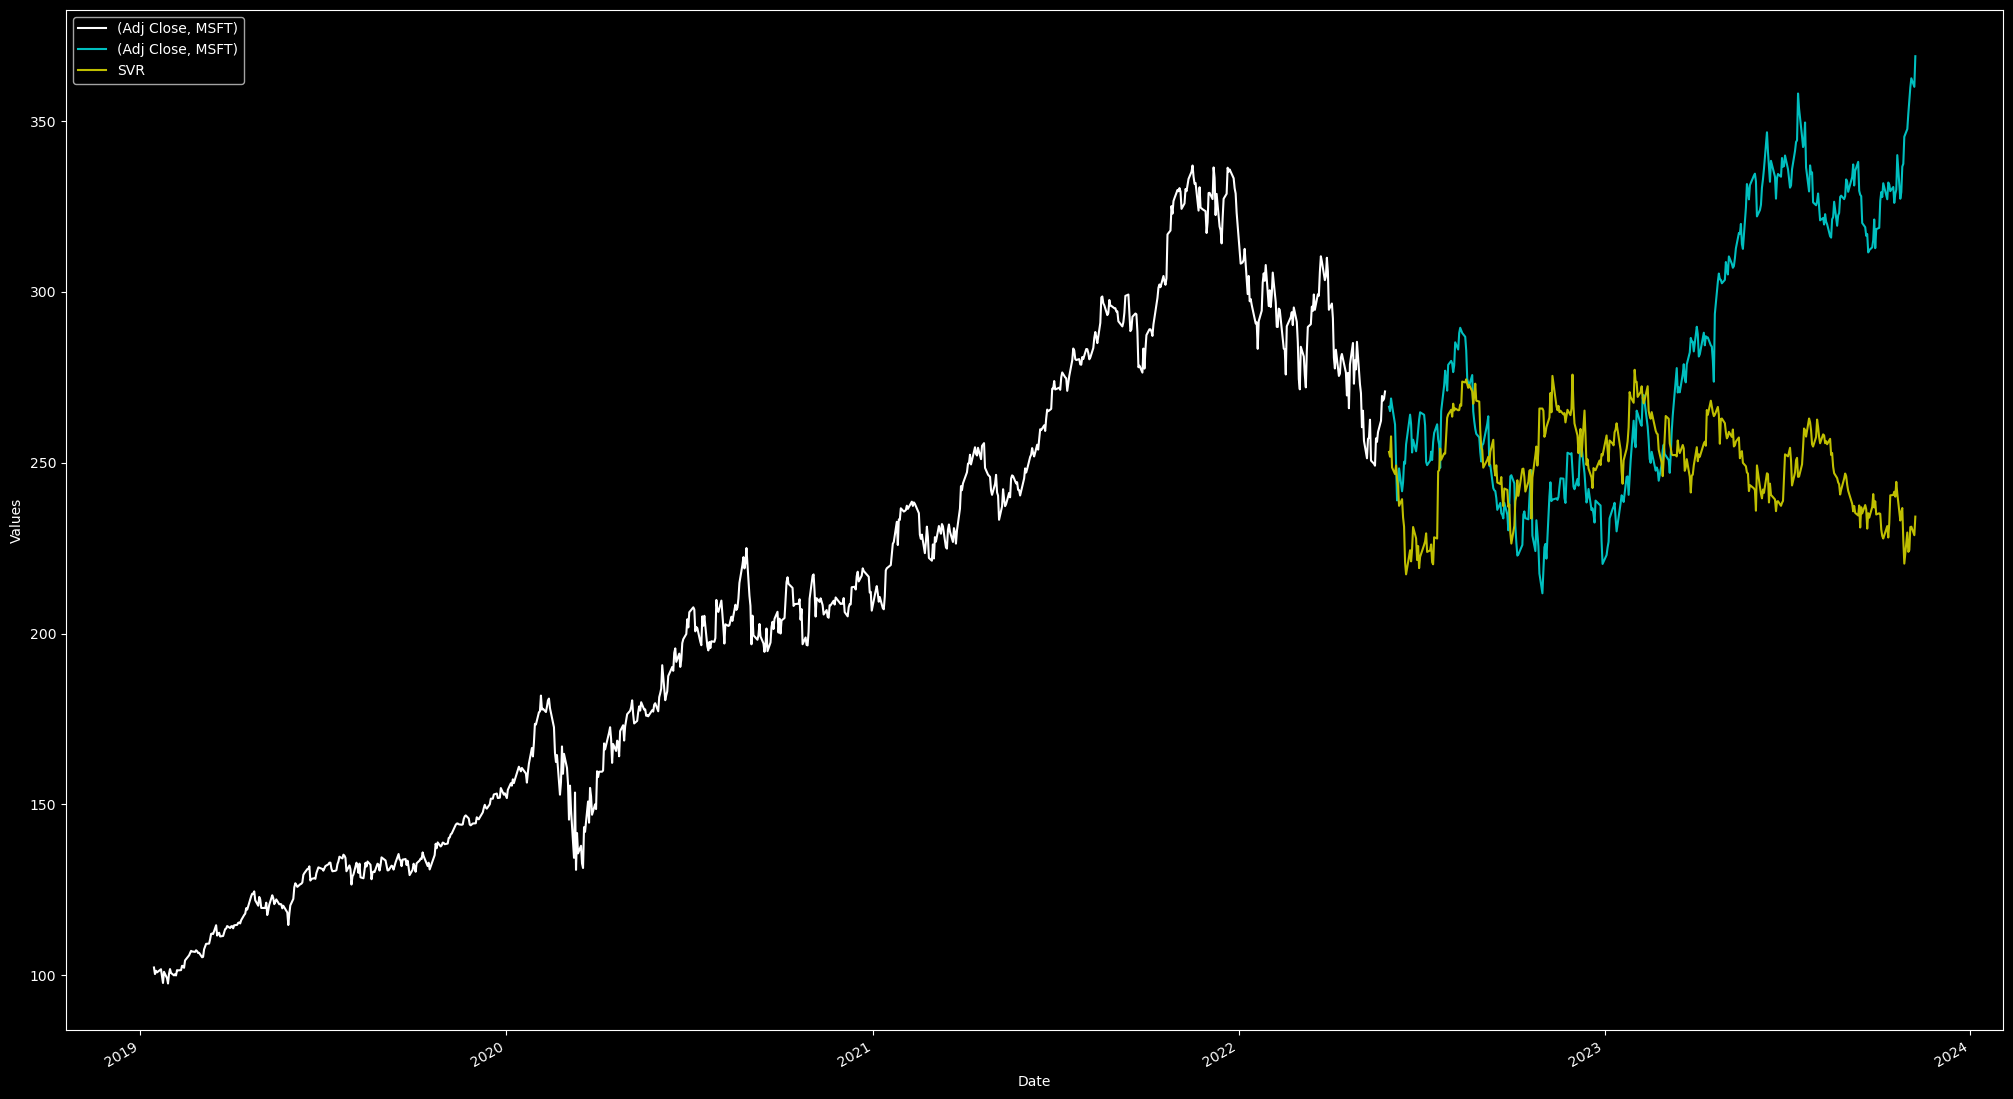

</details>

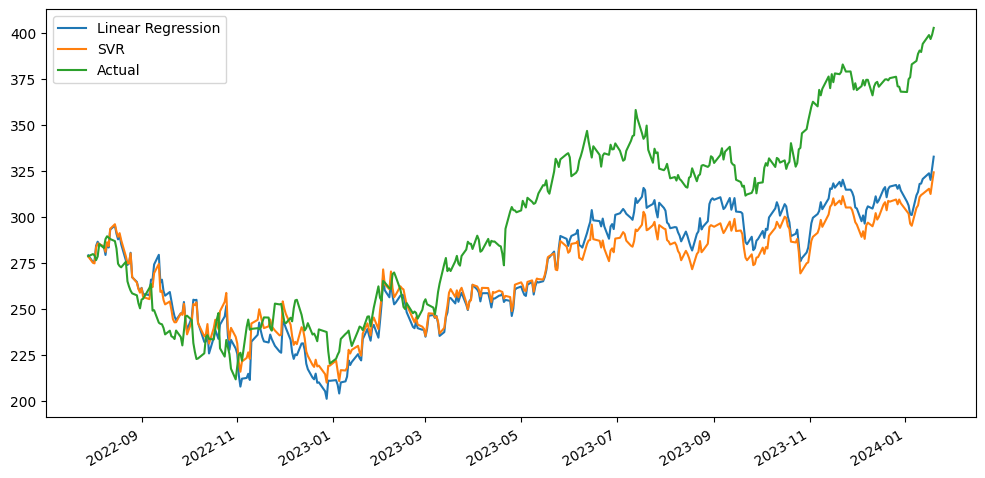

In [19]:
### START CODE HERE ###

# Create Linear Regression model with best parameters
linear_model = LinearRegression(fit_intercept=best_params['LR']['fit_intercept'])

# Create SVR model with best parameters
svr_model = SVR(
    C=best_params['SVR']['C'],
    degree=best_params['SVR']['degree'],
    gamma=best_params['SVR']['gamma'],
    kernel=best_params['SVR']['kernel']
)

# Fit the models on the training data
linear_model.fit(X_train, Y_train)
svr_model.fit(X_train, Y_train)

# Predict the values using the models
linear_predictions = linear_model.predict(X_test)

svr_predictions = svr_model.predict(X_test)

# Create a dataframe to compare the predicted values with the actual values
comparison_df = pd.DataFrame({
    'Linear Regression': linear_predictions,
    'SVR': svr_predictions,
    'Actual': Y_test
    })

# Concatenate the comparison dataframe with the Y_train dataframe

# Plot the graph
comparison_df.plot(figsize=(12, 6))

# Show the plot
plt.show()
### END CODE HERE ###

### **Random Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `{'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'epsilon': [0.1, 1, 5], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [20]:
### START CODE HERE ###
linear_model_random = LinearRegression()
svr_random = SVR()
### END CODE HERE ###

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [23]:
regression = {
    'LR': LinearRegression(),
    'SVR': SVR()
}

fit_intercept = [True, False]
params_LR = dict(fit_intercept=fit_intercept)

kernel = ['linear', 'rbf', 'poly']
C_list = list(np.linspace(0.01, 0.7, 5, dtype=float))
gamma_list = list(np.linspace(0.01, 0.7, 5, dtype=float))
degree = [2, 3]
params_SVR = dict(kernel=kernel, C=C_list, gamma=gamma_list, degree=degree)

best_params = {}

for EST in regression:
    model = regression[EST]
    if EST == 'LR':
        params = params_LR
    else:
        params = params_SVR
    grid_rand = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        scoring='neg_mean_squared_error',
        cv=4,
        verbose=4,
        n_jobs=1,
        n_iter=5)
    grid_rand.fit(X_train, Y_train)
    best_params[EST] = grid_rand.best_params_
    print(EST, grid_rand.best_params_)

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4] END .............fit_intercept=True;, score=-366.167 total time=   0.0s
[CV 2/4] END .............fit_intercept=True;, score=-315.709 total time=   0.0s
[CV 3/4] END ..............fit_intercept=True;, score=-59.191 total time=   0.0s
[CV 4/4] END .............fit_intercept=True;, score=-680.686 total time=   0.0s
[CV 1/4] END ..........fit_intercept=False;, score=-44533.506 total time=   0.0s
[CV 2/4] END ..........fit_intercept=False;, score=-24642.668 total time=   0.0s
[CV 3/4] END ..........fit_intercept=False;, score=-15730.876 total time=   0.0s
[CV 4/4] END ..........fit_intercept=False;, score=-80896.055 total time=   0.0s
LR {'fit_intercept': True}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV 1/4] END C=0.7, degree=2, gamma=0.1825, kernel=rbf;, score=-12505.860 total time=   0.0s
[CV 2/4] END C=0.7, degree=2, gamma=0.1825, kernel=rbf;, score=-3752.042 total time=   0.0s
[CV 3/4] END C=0.7, d

Utilize the best parameters obtained from random grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the comared dataframe with the Y_train.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
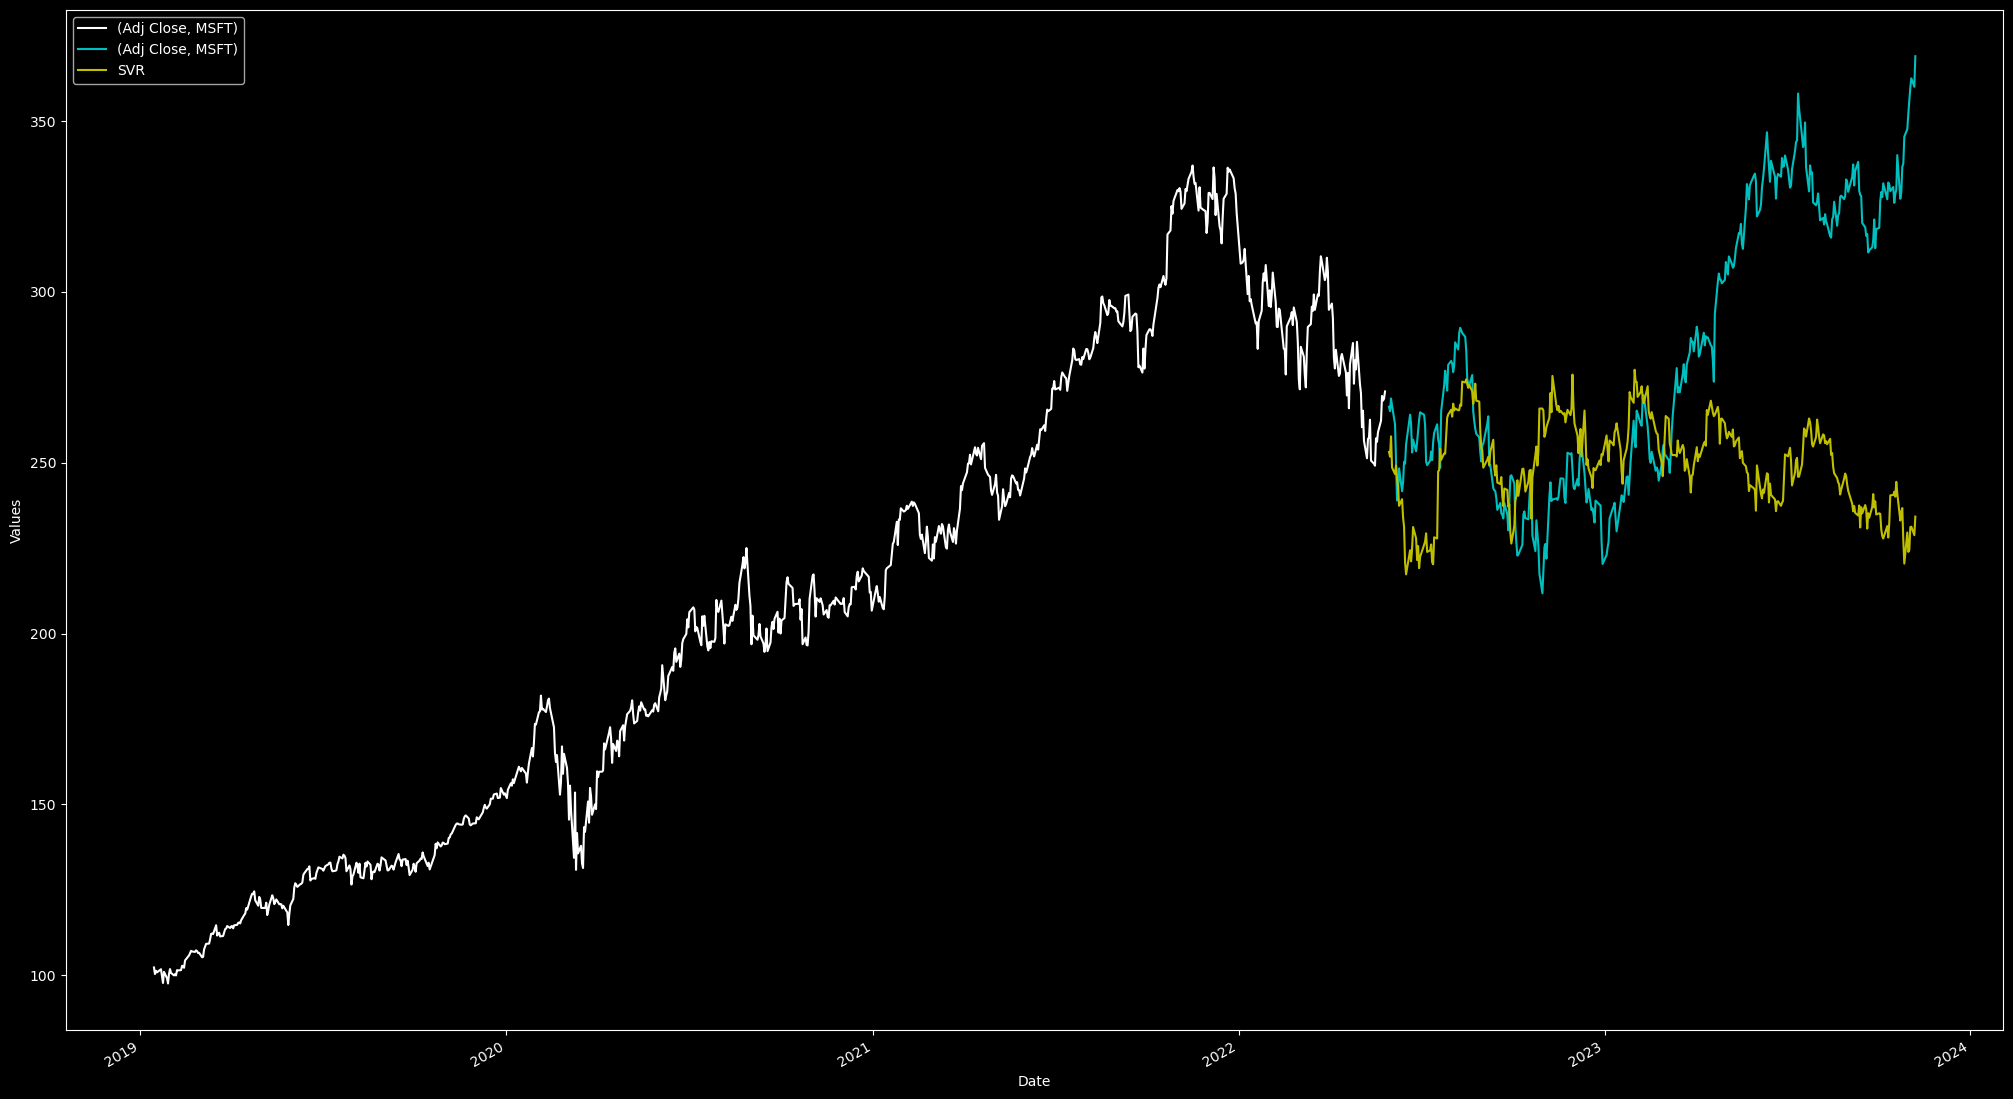

</details>

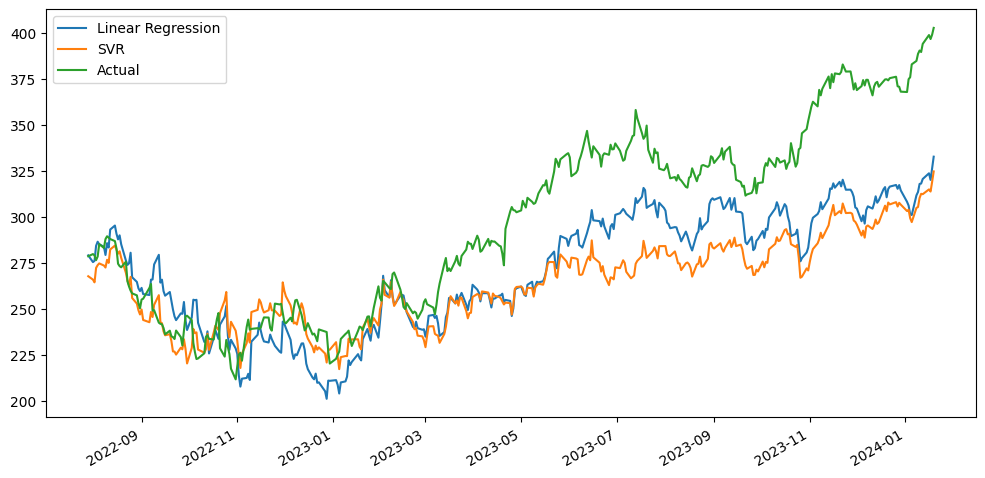

In [22]:
### START CODE HERE ###

# Create Linear Regression model with best parameters
linear_model = LinearRegression(
    fit_intercept=best_params['LR']['fit_intercept'])

# Create SVR model with best parameters
svr_model = SVR(
    C=best_params['SVR']['C'],
    degree=best_params['SVR']['degree'],
    gamma=best_params['SVR']['gamma'],
    kernel=best_params['SVR']['kernel']
)

# Fit the models on the training data
linear_model.fit(X_train, Y_train)
svr_model.fit(X_train, Y_train)

# Predict the values using the models
linear_predictions = linear_model.predict(X_test)

svr_predictions = svr_model.predict(X_test)

# Create a dataframe to compare the predicted values with the actual values
comparison_df = pd.DataFrame({
    'Linear Regression': linear_predictions,
    'SVR': svr_predictions,
    'Actual': Y_test
})

# Plot the graph
comparison_df.plot(figsize=(12, 6))

# Show the plot
plt.show()
### END CODE HERE ###

### Question
1. Rank Top 3 Best parameters of SVM Models from GridSearchCV.
2. Rank Top 3 Best parameters of SVM Models from RandomizedSearchCV.
3. Are those best parameters from GridSearchCV similar to RandomizedSearchCV? Explain?
4. What is the Mean Squared Error (MSE) for the best parameters obtained through both GridSearchCV and RandomizedSearchCV??

1. ของ Grid Search
   1. C=10, kernel=linear; score=-55.372
   2. C=0.1, kernel=linear;, score=-118.007
   3. C=0.1, degree=3, kernel=poly;, score=-998.652

2. ของ Randomzied Search
   1. C=0.355, kernel=linear; score=-103.252
   2. C=0.01, kernel=linear; score=-1317.477
   3. C=0.01, degree=3, kernel=poly; score=-1601.059

3. Best Grid Search
   C=10, kernel=linear; score=-55.372

   Best Randomized Search
   C=0.355, degree=3, gamma=0.7, kernel=linear;, score=-103.252
4. Grid -55.372, Randomized-103.252
